# 20/11/23 - Hiearchical clustering
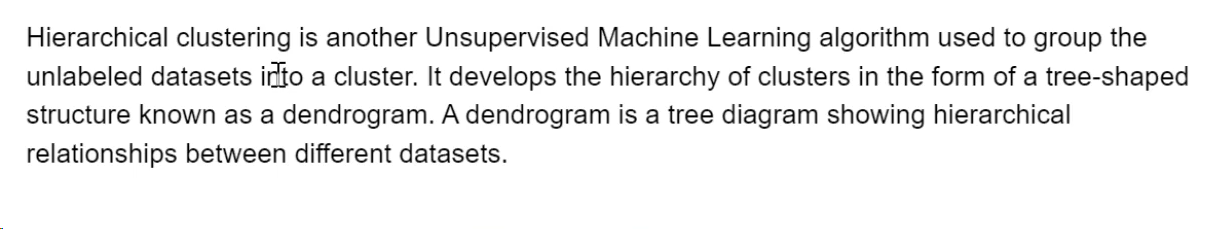
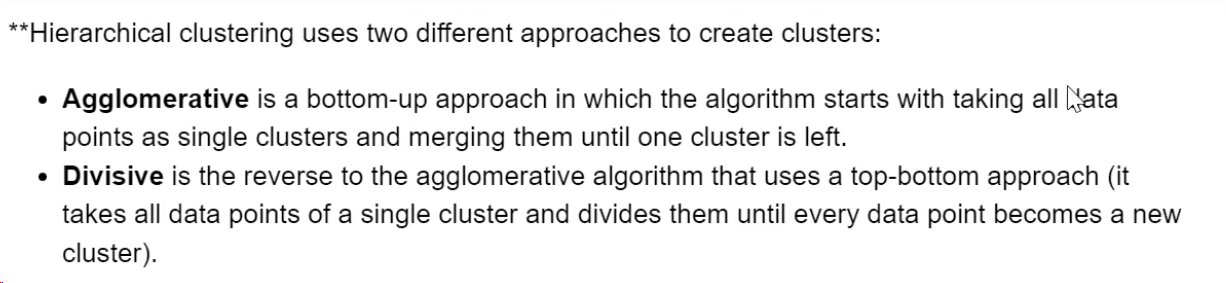

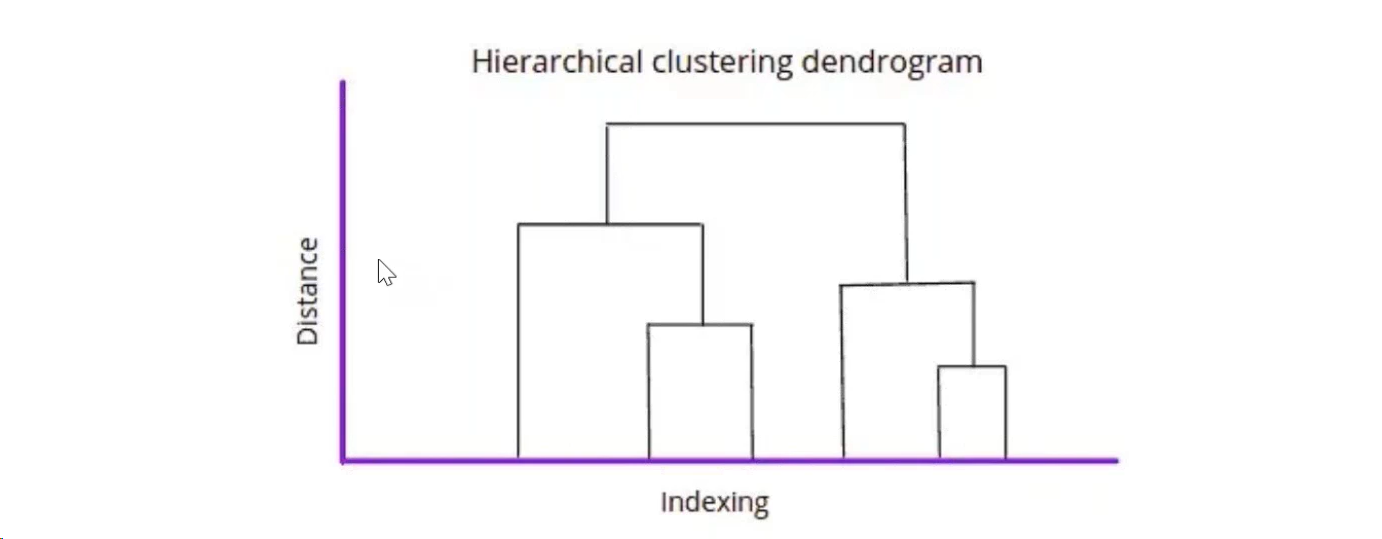
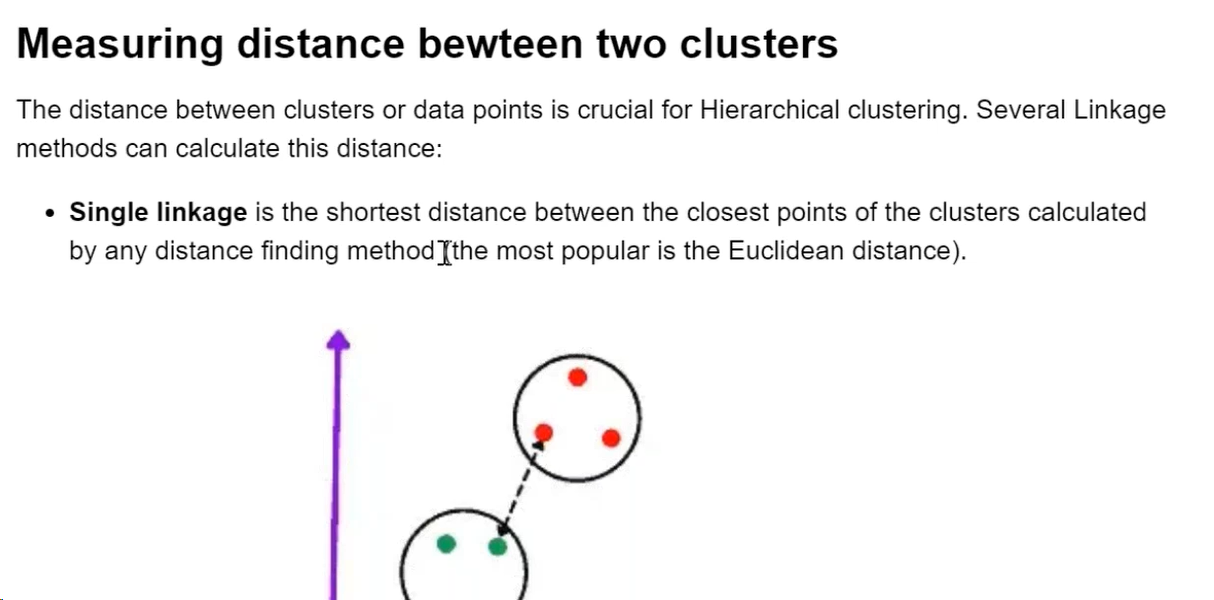

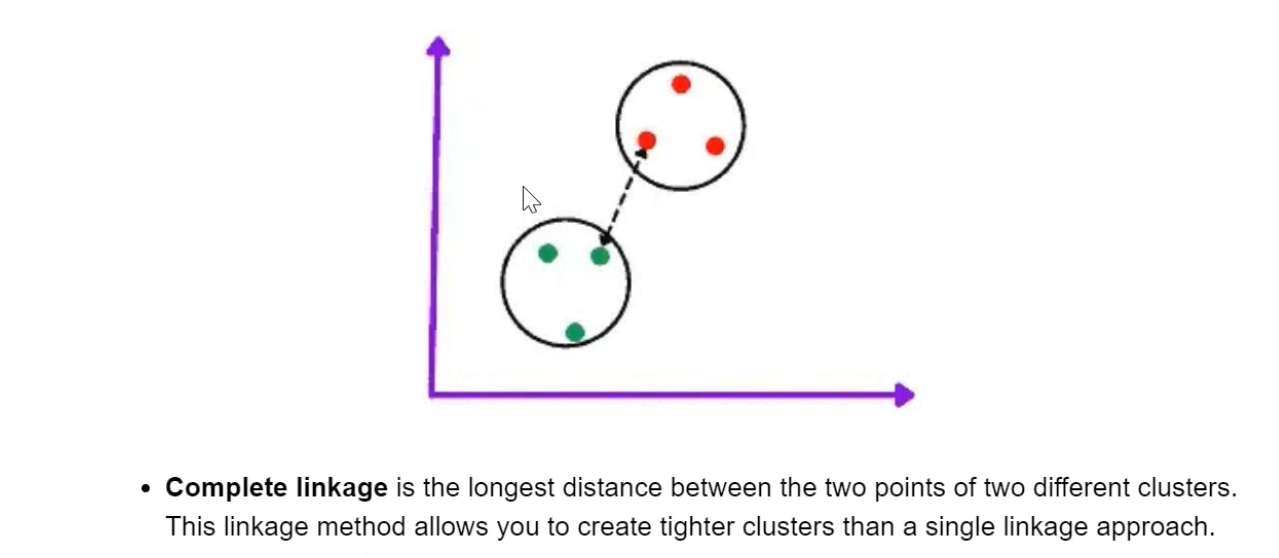
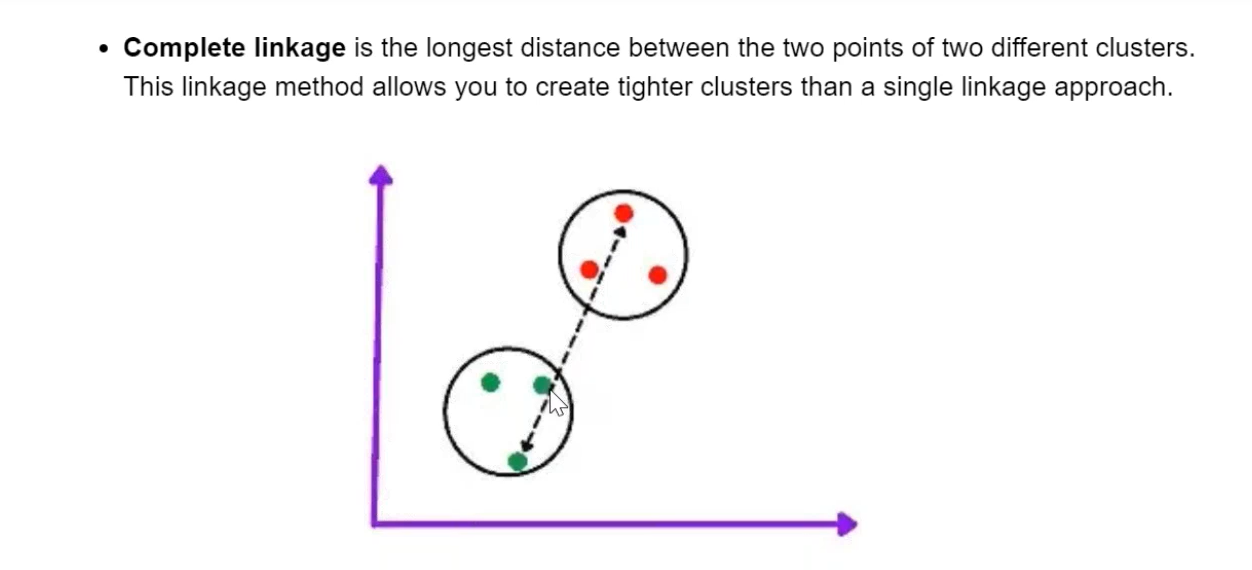
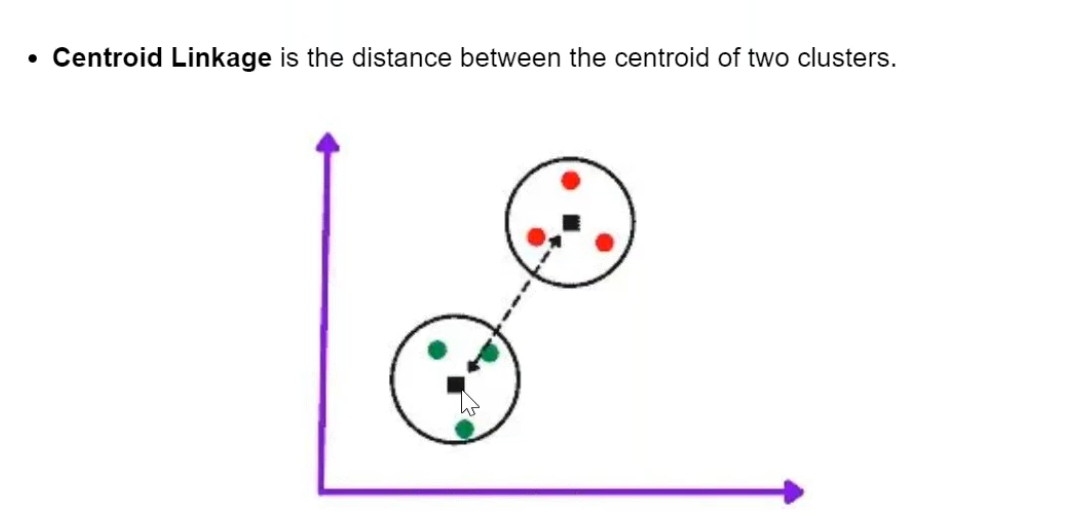

## Dendogram
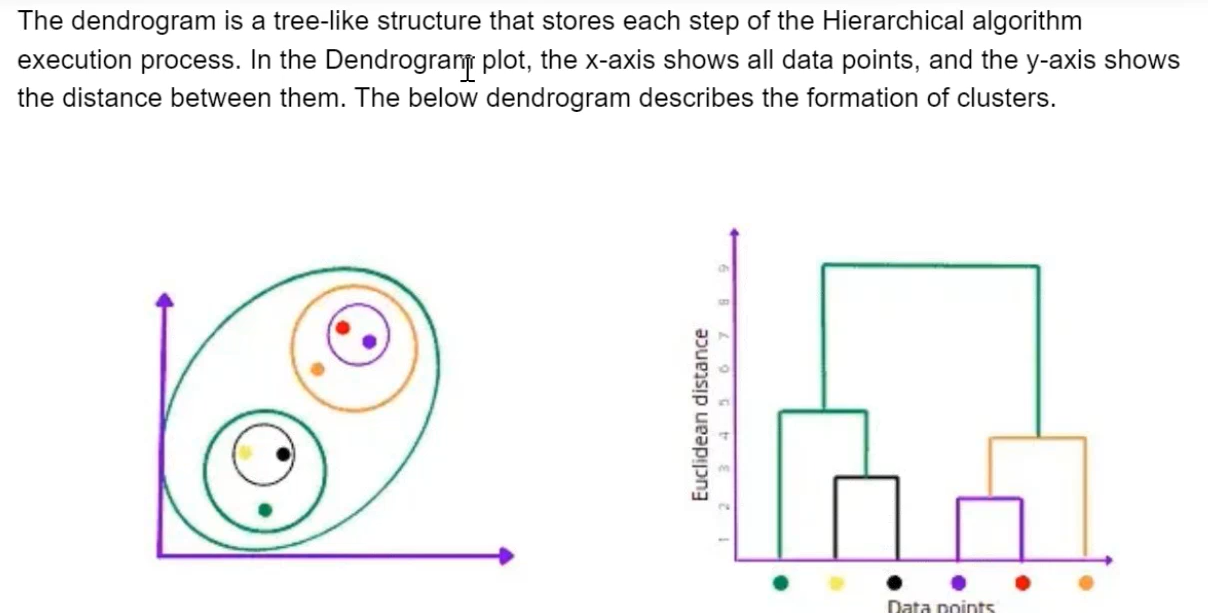
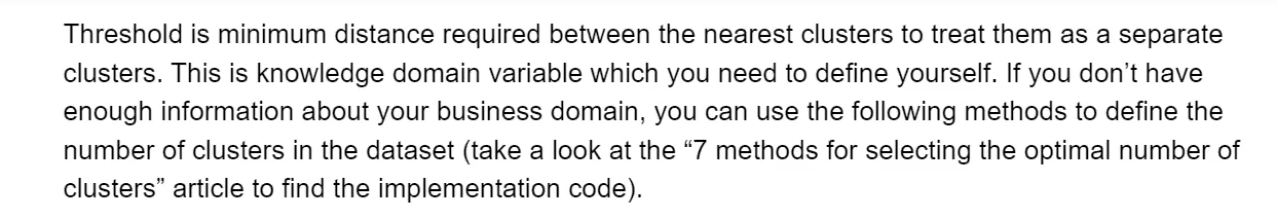
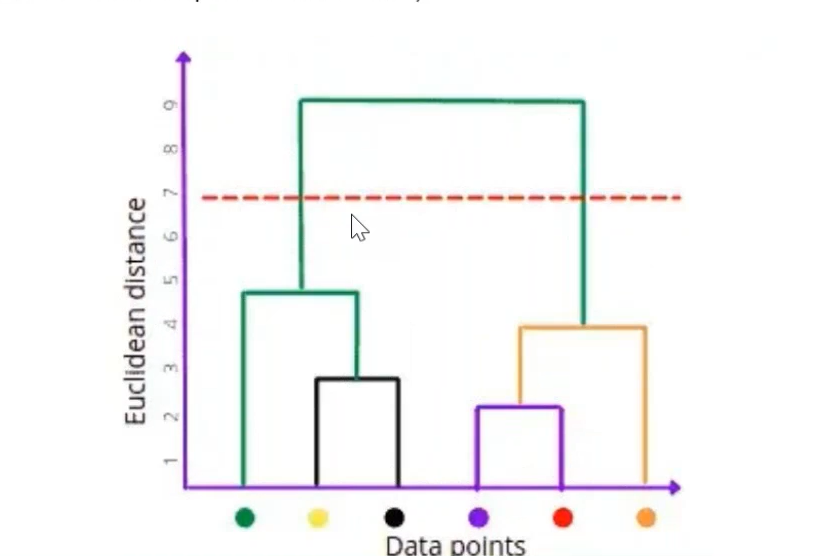


In [3]:
import pandas as pd
df  = pd.read_csv('../../dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


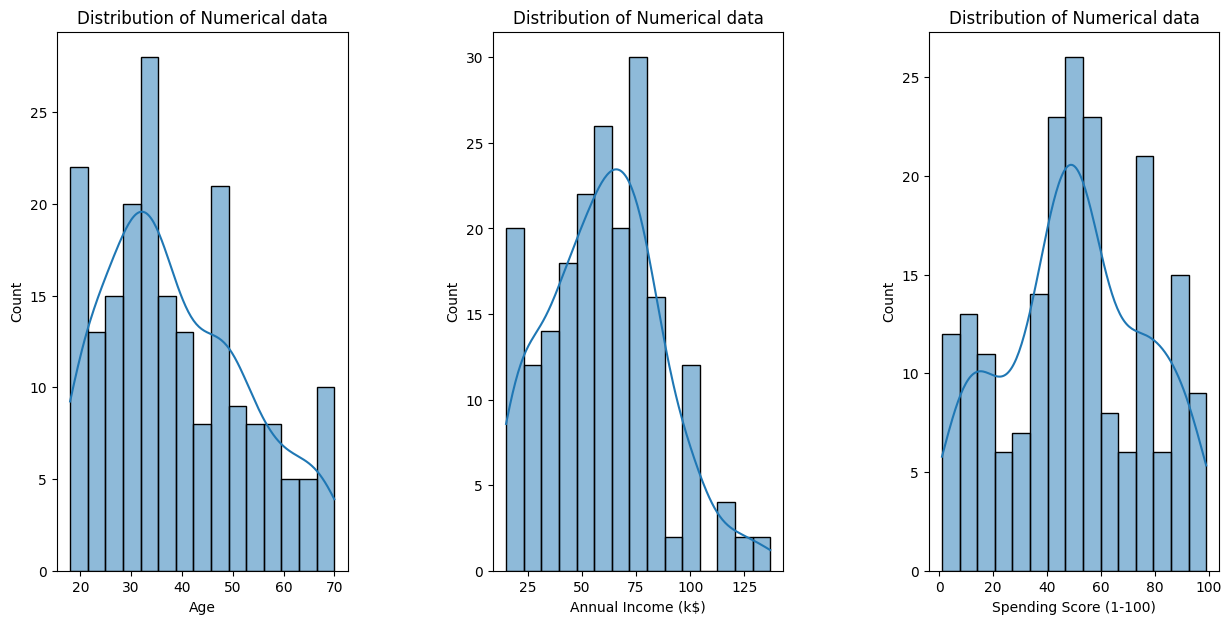

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
graph = 0
for i in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    graph+=1
    
    plt.subplot(1,3,graph)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.histplot(df[i],bins=15,kde=True)
    plt.title("Distribution of Numerical data")

plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


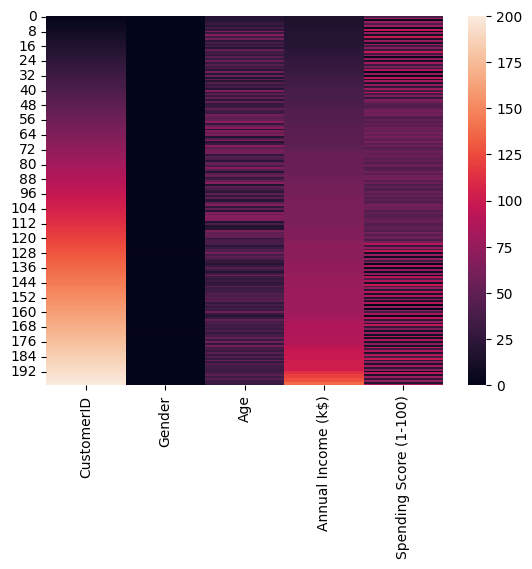

In [13]:
sns.heatmap(df)
plt.show()

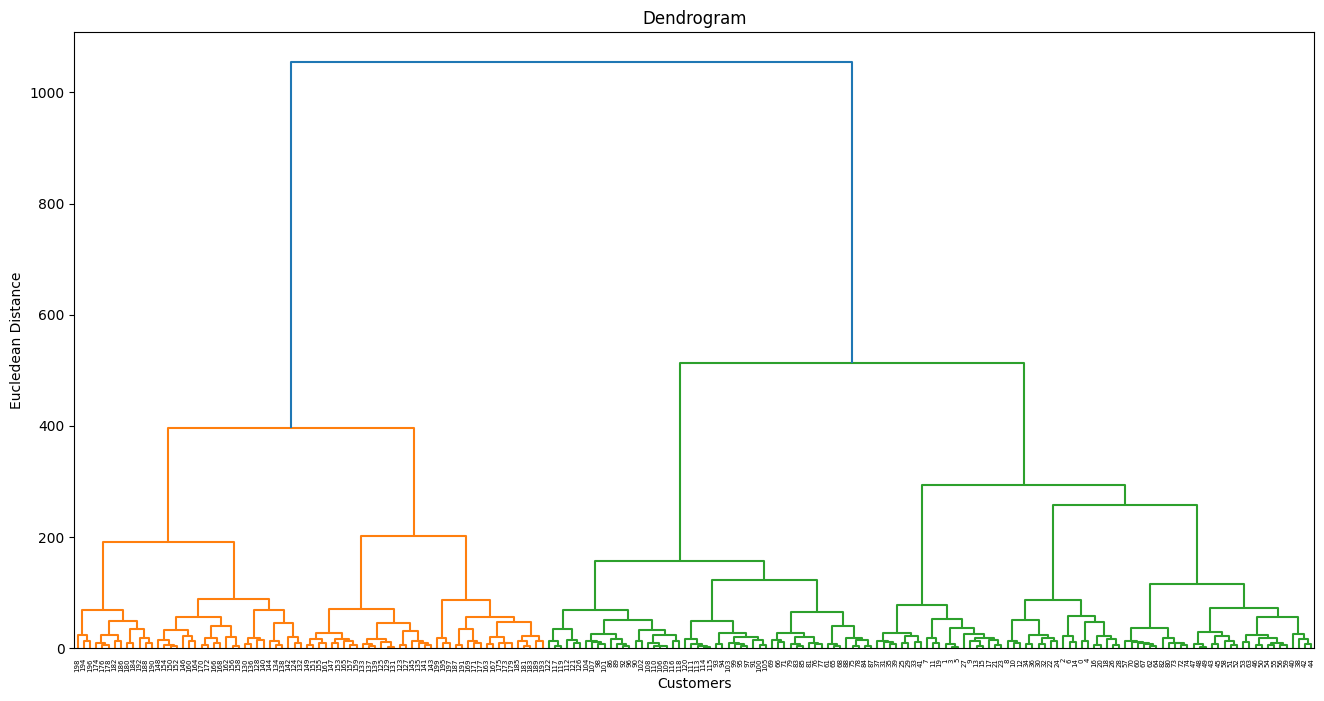

In [14]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(16,8))

dendrogram = sch.dendrogram(sch.linkage(df,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledean Distance")
plt.show()

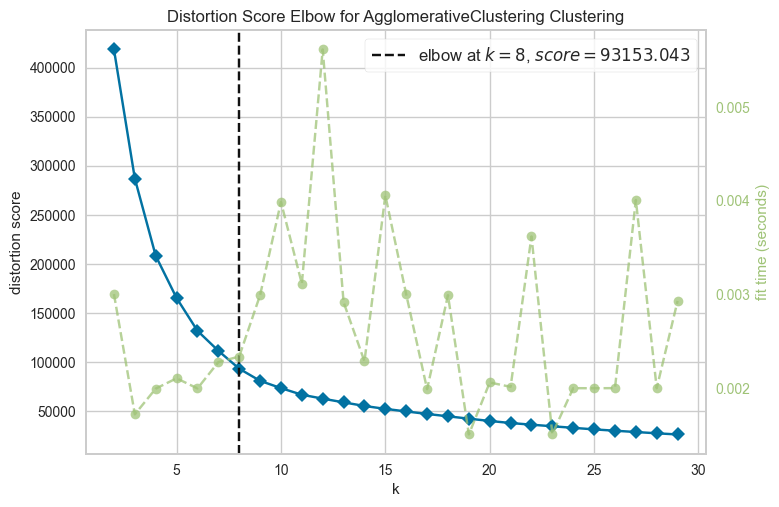

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
# k is the range of clusters
model = AgglomerativeClustering()
viz = KElbowVisualizer(model, k=(2,30))
viz.fit(df)
viz.show()